In [ ]:
!pip install xgboost
!pip install catboost
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.8 MB/s eta 0:00:00


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/CSE427/ML Project/air_quality_index_dataset.xlsx'

sheets_dict = pd.read_excel(file_path, sheet_name=None)  #reading all sheets
df_list = []
for sheet_name, df in sheets_dict.items():
    df['Location'] = sheet_name  # Add location info
    df_list.append(df)

data = pd.concat(df_list, ignore_index=True)

In [ ]:
data.head()

,Date,Time,SO2,NO,NO2,NOX,CO,CO 8hr,O3,O3 8hr,...,Wind Dir,Temperature,RH,Solar Rad,BP,Rain,V Wind Speed,Unnamed: 20,Location,Unnamed: 21
0,2012-11-01 00:00:00,01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sangsad,NaN
1,2012-11-01 00:00:00,02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sangsad,NaN
2,2012-11-01 00:00:00,03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sangsad,NaN
3,2012-11-01 00:00:00,04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sangsad,NaN
4,2012-11-01 00:00:00,05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sangsad,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944182 entries, 0 to 944181
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          936063 non-null  object 
 1   Time          813064 non-null  object 
 2   SO2           471656 non-null  object 
 3   NO            487774 non-null  float64
 4   NO2           484768 non-null  float64
 5   NOX           533675 non-null  object 
 6   CO            515964 non-null  float64
 7   CO 8hr        461844 non-null  float64
 8   O3            531487 non-null  float64
 9   O3 8hr        469219 non-null  object 
 10  PM2.5         591370 non-null  object 
 11  PM10          572628 non-null  object 
 12  Wind Speed    427700 non-null  object 
 13  Wind Dir      438815 non-null  object 
 14  Temperature   465850 non-null  float64
 15  RH            475237 non-null  float64
 16  Solar Rad     426815 non-null  float64
 17  BP            424428 non-null  float64
 18  Rain

In [ ]:
data.isnull().sum()


,0
Date,8119
Time,131118
SO2,472526
NO,456408
NO2,459414
NOX,410507
CO,428218
CO 8hr,482338
O3,412695
O3 8hr,474963


In [ ]:
data['Location'].value_counts()


,count
Location,
Rajshahi,88180
BARC,80135
Gazipur,80064
Darussalam,80064
Agrabad Chittagong,80064
Barishal,80064
Khulna,80064
Sylhet,80064
TV st-Chittagong,80063


In [ ]:
print(data.columns)
print(data.isnull().sum())

Index(['Date', 'Time', 'SO2', 'NO', 'NO2', 'NOX', 'CO', 'CO 8hr', 'O3',
       'O3 8hr', 'PM2.5', 'PM10', 'Wind Speed', 'Wind Dir', 'Temperature',
       'RH', 'Solar Rad', 'BP', 'Rain', 'V Wind Speed', 'Unnamed: 20',
       'Location', 'Unnamed: 21'],
      dtype='object')
Date              8119
Time            131118
SO2             472526
NO              456408
NO2             459414
NOX             410507
CO              428218
CO 8hr          482338
O3              412695
O3 8hr          474963
PM2.5           352812
PM10            371554
Wind Speed      516482
Wind Dir        505367
Temperature     478332
RH              468945
Solar Rad       517367
BP              519754
Rain            646690
V Wind Speed    829316
Unnamed: 20     944179
Location             0
Unnamed: 21     944180
dtype: int64


In [ ]:
# data.to_csv("combined_aqi_data.csv", index=False)


In [ ]:
# from google.colab import files
# files.download("combined_aqi_data.csv")  # or .csv if you saved as CSV


# DATA **PROCESSING**

In [ ]:
data = data.drop(columns=[
    'Unnamed: 20', 'Unnamed: 21', 'Rain', 'V Wind Speed', 'CO 8hr',
    'O3 8hr', 'CO', 'NO', 'NO2', 'NOX', 'SO2', 'O3', 'PM10', 'Solar Rad', 'BP', 'Wind Dir'
])


In [ ]:
data.head()

,Date,Time,PM2.5,Wind Speed,Temperature,RH,Location
0,2012-11-01 00:00:00,01:00,NaN,NaN,NaN,NaN,Sangsad
1,2012-11-01 00:00:00,02:00,NaN,NaN,NaN,NaN,Sangsad
2,2012-11-01 00:00:00,03:00,NaN,NaN,NaN,NaN,Sangsad
3,2012-11-01 00:00:00,04:00,NaN,NaN,NaN,NaN,Sangsad
4,2012-11-01 00:00:00,05:00,NaN,NaN,NaN,NaN,Sangsad


In [ ]:
# Step 1: Convert both Date and Time to string first
data['Date'] = data['Date'].astype(str)
data['Time'] = data['Time'].astype(str)

# Step 2: Combine into one Datetime column
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], errors='coerce')

data.drop(columns=['Date', 'Time'], inplace=True)

/tmp/ipython-input-14-2608046067.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], errors='coerce')


In [ ]:
data = data.sort_values(['Location', 'Datetime'])


In [ ]:
data.head()

,PM2.5,Wind Speed,Temperature,RH,Location,Datetime
458781,54.59,NaN,26.83,82.98,Agrabad Chittagong,2012-11-01 01:00:00
458782,73.07,1.95,26.63,79.61,Agrabad Chittagong,2012-11-01 02:00:00
458783,42.11,2.02,25.76,83.86,Agrabad Chittagong,2012-11-01 03:00:00
458784,46.09,1.81,25.17,87.53,Agrabad Chittagong,2012-11-01 04:00:00
458785,48.84,1.87,24.85,NaN,Agrabad Chittagong,2012-11-01 05:00:00


In [ ]:
# Fix commas and convert to float for all relevant columns
for col in ['PM2.5', 'Temperature', 'RH', 'Wind Speed']:
    data[col] = data[col].astype(str).str.replace(',', '.', regex=False)  # replace comma with dot
    data[col] = pd.to_numeric(data[col], errors='coerce')  # convert to float, turn invalids into NaN



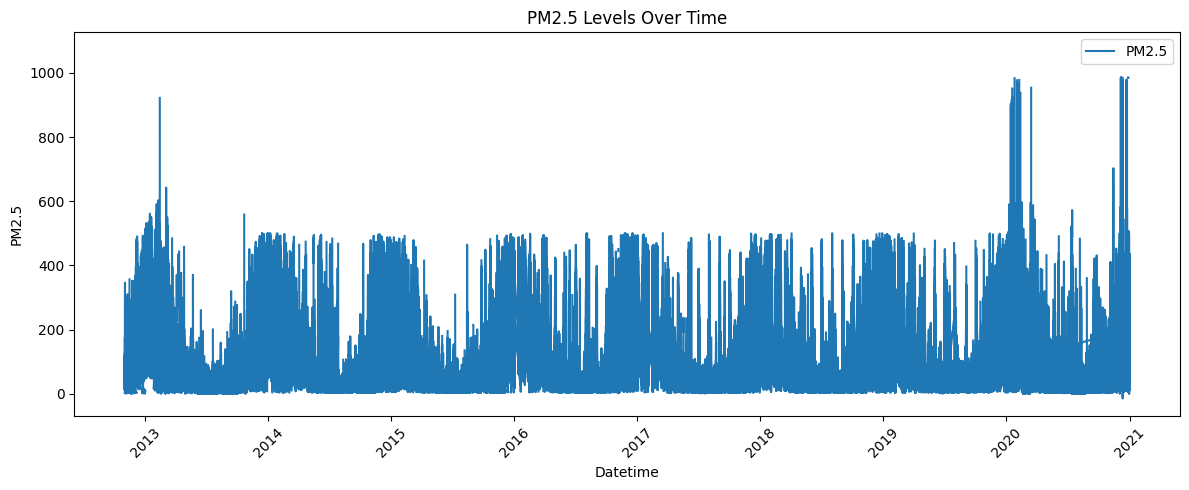

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(data['Datetime'], data['PM2.5'], label='PM2.5')
plt.xlabel('Datetime')
plt.ylabel('PM2.5')
plt.title('PM2.5 Levels Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
data['PM2.5'] = data.groupby('Location')['PM2.5'].transform(lambda x: x.fillna(x.median()))
data['Temperature'] = data.groupby('Location')['Temperature'].transform(lambda x: x.fillna(x.median()))
data['RH'] = data.groupby('Location')['RH'].transform(lambda x: x.fillna(x.median()))
data['Wind Speed'] = data.groupby('Location')['Wind Speed'].transform(lambda x: x.fillna(x.median()))


In [ ]:
data.head(10)

,PM2.5,Wind Speed,Temperature,RH,Location,Datetime
458781,54.59,1.72,26.83,82.98,Agrabad Chittagong,2012-11-01 01:00:00
458782,73.07,1.95,26.63,79.61,Agrabad Chittagong,2012-11-01 02:00:00
458783,42.11,2.02,25.76,83.86,Agrabad Chittagong,2012-11-01 03:00:00
458784,46.09,1.81,25.17,87.53,Agrabad Chittagong,2012-11-01 04:00:00
458785,48.84,1.87,24.85,75.63,Agrabad Chittagong,2012-11-01 05:00:00
458786,43.06,2.53,24.80,75.63,Agrabad Chittagong,2012-11-01 06:00:00
458787,45.20,2.42,25.90,86.20,Agrabad Chittagong,2012-11-01 07:00:00
458788,52.14,2.36,27.82,79.07,Agrabad Chittagong,2012-11-01 08:00:00
458789,56.96,3.01,29.17,72.59,Agrabad Chittagong,2012-11-01 09:00:00
458790,54.47,2.46,26.10,65.21,Agrabad Chittagong,2012-11-01 10:00:00


In [ ]:
data.isnull().sum()

,0
PM2.5,0
Wind Speed,7944
Temperature,7944
RH,7944
Location,0
Datetime,172697


In [ ]:
for col in ['Temperature', 'RH', 'Wind Speed']:
    data[col] = data[col].fillna(data[col].median())

In [ ]:
data.isnull().sum()

,0
PM2.5,0
Wind Speed,0
Temperature,0
RH,0
Location,0
Datetime,172697


In [ ]:
def categorize_aqi(pm):
    if pm <= 50:
        return 'Good'
    elif pm <= 100:
        return 'Moderate'
    else:
        return 'Unhealthy'

data['AQI_Category'] = data['PM2.5'].apply(categorize_aqi)


In [ ]:
data['Hour'] = data['Datetime'].dt.hour
data['Day'] = data['Datetime'].dt.day
data['Month'] = data['Datetime'].dt.month
data['Weekday'] = data['Datetime'].dt.weekday  # 0 = Monday


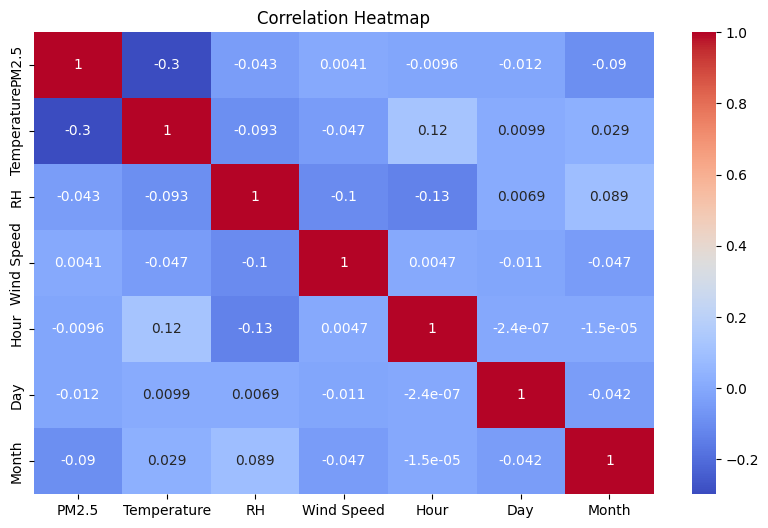

In [ ]:
features = ['PM2.5', 'Temperature', 'RH', 'Wind Speed', 'Hour', 'Day', 'Month']
plt.figure(figsize=(10, 6))
sns.heatmap(data[features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
le = LabelEncoder()
data['AQI_Label'] = le.fit_transform(data['AQI_Category'])  # Good=0, Moderate=1, Unhealthy=2


In [ ]:
data.head()

,PM2.5,Wind Speed,Temperature,RH,Location,Datetime,AQI_Category,Hour,Day,Month,Weekday,AQI_Label
458781,54.59,1.72,26.83,82.98,Agrabad Chittagong,2012-11-01 01:00:00,Moderate,1.0,1.0,11.0,3.0,1
458782,73.07,1.95,26.63,79.61,Agrabad Chittagong,2012-11-01 02:00:00,Moderate,2.0,1.0,11.0,3.0,1
458783,42.11,2.02,25.76,83.86,Agrabad Chittagong,2012-11-01 03:00:00,Good,3.0,1.0,11.0,3.0,0
458784,46.09,1.81,25.17,87.53,Agrabad Chittagong,2012-11-01 04:00:00,Good,4.0,1.0,11.0,3.0,0
458785,48.84,1.87,24.85,75.63,Agrabad Chittagong,2012-11-01 05:00:00,Good,5.0,1.0,11.0,3.0,0


In [ ]:
data_clean = data.dropna(subset=['Datetime', 'Hour', 'Day', 'Month', 'PM2.5','Wind Speed', 'Temperature','RH','Location','AQI_Category','AQI_Label', 'Weekday'])


In [ ]:
data_clean.isnull().sum()

,0
PM2.5,0
Wind Speed,0
Temperature,0
RH,0
Location,0
Datetime,0
AQI_Category,0
Hour,0
Day,0
Month,0


Class Distribution:
 AQI_Label
0    350697
1    287490
2    133298
Name: count, dtype: int64


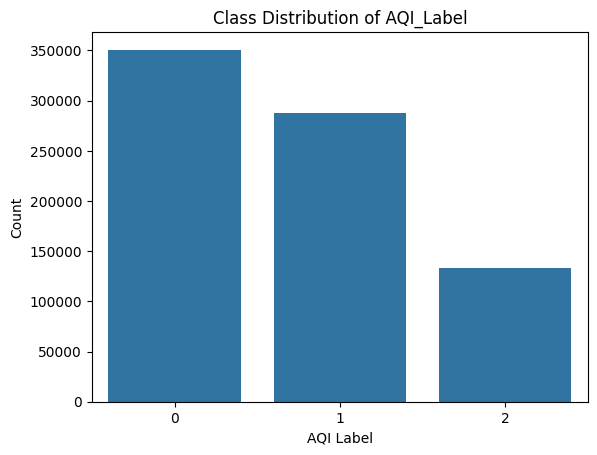

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check class distribution
class_counts = data_clean['AQI_Label'].value_counts().sort_index()
print("Class Distribution:\n", class_counts)

# Optional: visualize
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel("AQI Label")
plt.ylabel("Count")
plt.title("Class Distribution of AQI_Label")
plt.show()


In [ ]:
X = data_clean[['Temperature', 'RH', 'Wind Speed', 'Hour', 'Day', 'Month']]
y = data_clean['AQI_Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42
)

model.fit(X_train_scaled, y_train)


RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [ ]:
y_pred = model.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print(f"Training Accuracy: {model.score(X_train_scaled, y_train):.4f}")
print(f"Testing Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82     69987
           1       0.72      0.70      0.71     57664
           2       0.71      0.68      0.70     26646

    accuracy                           0.76    154297
   macro avg       0.74      0.74      0.74    154297
weighted avg       0.76      0.76      0.76    154297

Training Accuracy: 0.8215
Testing Accuracy: 0.7568


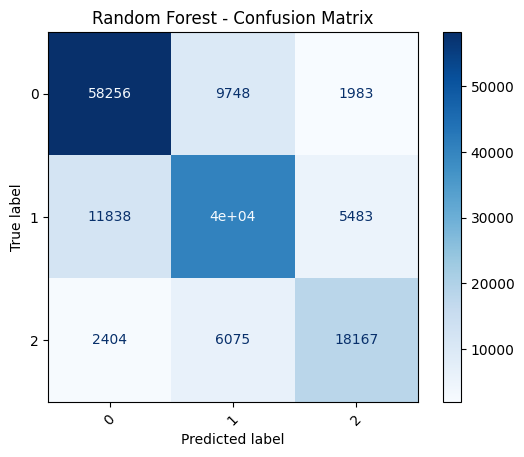

In [ ]:
y_pred = model.predict(X_test_scaled)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Random Forest - Confusion Matrix")
plt.show()

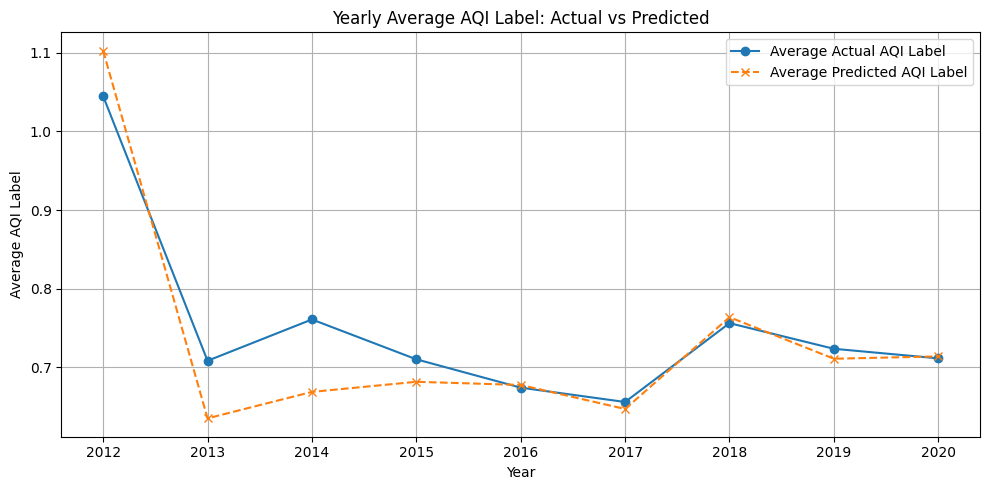

In [ ]:
# Predict
y_pred = model.predict(X_test_scaled)

# Create a DataFrame only with test samples
X_test_with_time = data_clean.loc[X_test.index].copy()  # Only rows in the test set
X_test_with_time['y_test'] = y_test
X_test_with_time['y_pred'] = y_pred

# Convert 'Datetime' column to datetime if it's not already
X_test_with_time['Datetime'] = pd.to_datetime(X_test_with_time['Datetime'])

# Extract year
X_test_with_time['Year'] = X_test_with_time['Datetime'].dt.year

# Group by year and compute average labels
yearly_avg = X_test_with_time.groupby('Year')[['y_test', 'y_pred']].mean()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(yearly_avg.index, yearly_avg['y_test'], label='Average Actual AQI Label', marker='o')
plt.plot(yearly_avg.index, yearly_avg['y_pred'], label='Average Predicted AQI Label', marker='x', linestyle='--')

plt.title('Yearly Average AQI Label: Actual vs Predicted')
plt.xlabel('Year')
plt.ylabel('Average AQI Label')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
models = {
    "Decision Tree": DecisionTreeClassifier(
    max_depth=30,
    min_samples_split=10,
    min_samples_leaf=5,
    criterion='entropy',
    random_state=42),

    "KNN": KNeighborsClassifier(n_neighbors=5, weights='distance', metric='manhattan'),

    "AdaBoost": AdaBoostClassifier(
    n_estimators=300,
    learning_rate=0.5,
    random_state=42),

    "XGBoost": XGBClassifier(
    n_estimators=300,
    max_depth=8,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss',
    random_state=42,
    use_label_encoder=False),

    "LGBMC": LGBMClassifier(n_estimators=300, learning_rate=0.05, max_depth=8, random_state=42),

     "CatBoost": CatBoostClassifier(
        iterations=300,
        learning_rate=0.05,
        depth=8,
        verbose=0,
        random_state=42)


}

# Train and evaluate
for name, clf in models.items():
    print(f"\n{'='*10} {name} {'='*10}")
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



========== Decision Tree ==========
Accuracy: 0.7128784098200224
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78     69987
           1       0.66      0.67      0.67     57664
           2       0.67      0.59      0.63     26646

    accuracy                           0.71    154297
   macro avg       0.70      0.69      0.69    154297
weighted avg       0.71      0.71      0.71    154297


========== KNN ==========
Accuracy: 0.7100786146198566
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78     69987
           1       0.67      0.65      0.66     57664
           2       0.66      0.62      0.64     26646

    accuracy                           0.71    154297
   macro avg       0.70      0.69      0.69    154297
weighted avg       0.71      0.71      0.71    154297


========== AdaBoost ==========
Accuracy: 0.6326111330745251
Classif

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:56:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.741142083125401
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.81     69987
           1       0.70      0.68      0.69     57664
           2       0.69      0.67      0.68     26646

    accuracy                           0.74    154297
   macro avg       0.73      0.72      0.72    154297
weighted avg       0.74      0.74      0.74    154297


========== LGBMC ==========


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010053 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 834
[LightGBM] [Info] Number of data points in the train set: 617188, number of used features: 6
[LightGBM] [Info] Start training from score -0.787852
[LightGBM] [Info] Start training from score -0.987851
[LightGBM] [Info] Start training from score -1.755602


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy: 0.7168188623239596
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.81      0.79     69987
           1       0.68      0.64      0.66     57664
           2       0.65      0.65      0.65     26646

    accuracy                           0.72    154297
   macro avg       0.70      0.70      0.70    154297
weighted avg       0.71      0.72      0.72    154297


========== CatBoost ==========
Accuracy: 0.705865959804792
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78     69987
           1       0.66      0.63      0.65     57664
           2       0.64      0.62      0.63     26646

    accuracy                           0.71    154297
   macro avg       0.69      0.68      0.69    154297
weighted avg       0.70      0.71      0.70    154297



In [ ]:
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)  # Predict for this specific model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"\n{name}:")
    print(f"  MAE: {mae:.4f}")
    print(f"  MSE: {mse:.4f}")


Decision Tree:
  MAE: 0.3232
  MSE: 0.3953

KNN:
  MAE: 0.3267
  MSE: 0.4003

AdaBoost:
  MAE: 0.4131
  MSE: 0.5044

XGBoost:
  MAE: 0.2891
  MSE: 0.3497


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



LGBMC:
  MAE: 0.3180
  MSE: 0.3875

CatBoost:
  MAE: 0.3294
  MSE: 0.4001


In [ ]:
for name, clf in models.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot(cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.show()


In [ ]:
# Features and labels
X = data_clean[['Temperature', 'RH', 'Wind Speed', 'Hour', 'Day', 'Month']]
y = data_clean['AQI_Label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert labels to one-hot encoding
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)


In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))   # 3 classes: Good, Moderate, Unhealthy
# Compile
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
]
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weight_dict = dict(enumerate(class_weights))

# Train
history = model.fit(X_train_scaled, y_train_cat, epochs=100, batch_size=128, validation_split=0.2,callbacks=callbacks)


In [ ]:
# Evaluate
loss, accuracy = model.evaluate(X_test_scaled, y_test_cat)
print(f"\nTest Accuracy: {accuracy:.4f}")


In [ ]:
# svm_model = SVC(kernel='rbf', random_state=42)
# svm_model.fit(X_train_scaled, y_train)
# svm_pred = svm_model.predict(X_test_scaled)

# print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
# print("SVM Classification Report:\n", classification_report(y_test, svm_pred))

In [ ]:
y_pred_probs = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

print(classification_report(y_test, y_pred_classes))


In [ ]:
if isinstance(y_test, pd.Series):
    y_true = y_test.values
else:
    y_true = y_test

# Calculate MAE and MSE
mae = mean_absolute_error(y_true, y_pred_classes)
mse = mean_squared_error(y_true, y_pred_classes)

print(f"MAE (Neural Network): {mae:.4f}")
print(f"MSE (Neural Network): {mse:.4f}")

In [ ]:
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Good', 'Moderate', 'Unhealthy'])
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Neural Network - Confusion Matrix")
plt.show()

In [ ]:
# Plot validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.plot(history.history['loss'], label='Training Loss', marker='x', linestyle='--')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
!pip install tensorflow